<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Apache-spark-and-hadoop/blob/main/Predict_Loan_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import mode
import squarify
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Loan_Approval_Prediction.csv")

In [3]:
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.drop_duplicates(keep = False).shape

(614, 13)

In [6]:
df.dropna(subset = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'], how = 'any').shape

(480, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# drop the Date column
df.drop(columns=['Loan_ID'],inplace=True)

In [9]:
df["Gender"].fillna(method = 'ffill', inplace = True)
df["Married"].fillna(method = 'ffill', inplace = True)
df["Dependents"].fillna(method = 'ffill', inplace = True)
df["Self_Employed"].fillna(method = 'ffill', inplace = True)
df["LoanAmount"].fillna(method = 'ffill', inplace = True)
df["Loan_Amount_Term"].fillna(method = 'ffill', inplace = True)
df["Credit_History"].fillna(method = 'ffill', inplace = True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
df.apply(lambda x: x.dtype)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.16
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [13]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.162866
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
LoanAmount,1,0.162866
Gender,0,0.000000
Married,0,0.000000


In [15]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [16]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [17]:
numerical_data = df.select_dtypes(include=np.number)
numerical_col = numerical_data.columns

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  


In [18]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_col = categorical_data.columns

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
  Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y  


In [19]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [20]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  5


In [21]:
#Discrete Numerical Features
discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [22]:
#Continuous Numerical Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count: {}".format(len(continuous_features)))

Continuous feature Count: 3


In [23]:
df.describe(include = object)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,500,400,354,480,528,233,422


In [24]:
gender_Series = df['Gender']
gender_levels = gender_Series.unique()
gender_levels

array(['Male', 'Female'], dtype=object)

In [25]:
gender_freq_table = pd.crosstab(index = df['Gender'], columns = 'freq')
gender_freq_table

col_0,freq
Gender,
Female,114
Male,500


In [26]:
married_Series = df['Married']
married_levels = married_Series.unique()
married_levels

array(['No', 'Yes'], dtype=object)

In [27]:
married_freq_table = pd.crosstab(index = df['Married'], columns = 'freq')
married_freq_table

col_0,freq
Married,
No,214
Yes,400


In [28]:
dependents_Series = df['Dependents']
dependents_levels = dependents_Series.unique()
dependents_levels

array(['0', '1', '2', '3+'], dtype=object)

In [29]:
dependents_freq_table = pd.crosstab(index = df['Dependents'], columns = 'freq')
dependents_freq_table

col_0,freq
Dependents,
0,354
1,104
2,105
3+,51


In [30]:
education_Series = df['Education']
education_levels = education_Series.unique()
education_levels

array(['Graduate', 'Not Graduate'], dtype=object)

In [31]:
education_freq_table = pd.crosstab(index = df['Education'], columns = 'freq')
education_freq_table

col_0,freq
Education,
Graduate,480
Not Graduate,134


In [32]:
self_employed_Series = df['Self_Employed']
self_employed_levels = self_employed_Series.unique()
self_employed_levels

array(['No', 'Yes'], dtype=object)

In [33]:
self_employed_freq_table = pd.crosstab(index = df['Self_Employed'], columns = 'freq')
self_employed_freq_table

col_0,freq
Self_Employed,
No,528
Yes,86


In [34]:
property_area_Series = df['Property_Area']
property_area_levels = property_area_Series.unique()
property_area_levels

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [35]:
property_area_freq_table = pd.crosstab(index = df['Property_Area'], columns = 'freq')
property_area_freq_table

col_0,freq
Property_Area,
Rural,179
Semiurban,233
Urban,202


In [36]:
loan_status_Series = df['Loan_Status']
loan_status_levels = loan_status_Series.unique()
loan_status_levels

array(['Y', 'N'], dtype=object)

In [37]:
loan_status_freq_table = pd.crosstab(index = df['Loan_Status'], columns = 'freq')
loan_status_freq_table

col_0,freq
Loan_Status,
N,192
Y,422


In [38]:
df.describe(include = 'all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,613.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,500,400,354,480,528,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,147.381729,341.628664,0.835505,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,87.512302,65.656819,0.371027,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.000000,1.000000,NaN,NaN


In [39]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,613.000000,614.000000,614.000000
mean,5403.459283,1621.245798,147.381729,341.628664,0.835505
std,6109.041673,2926.248369,87.512302,65.656819,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


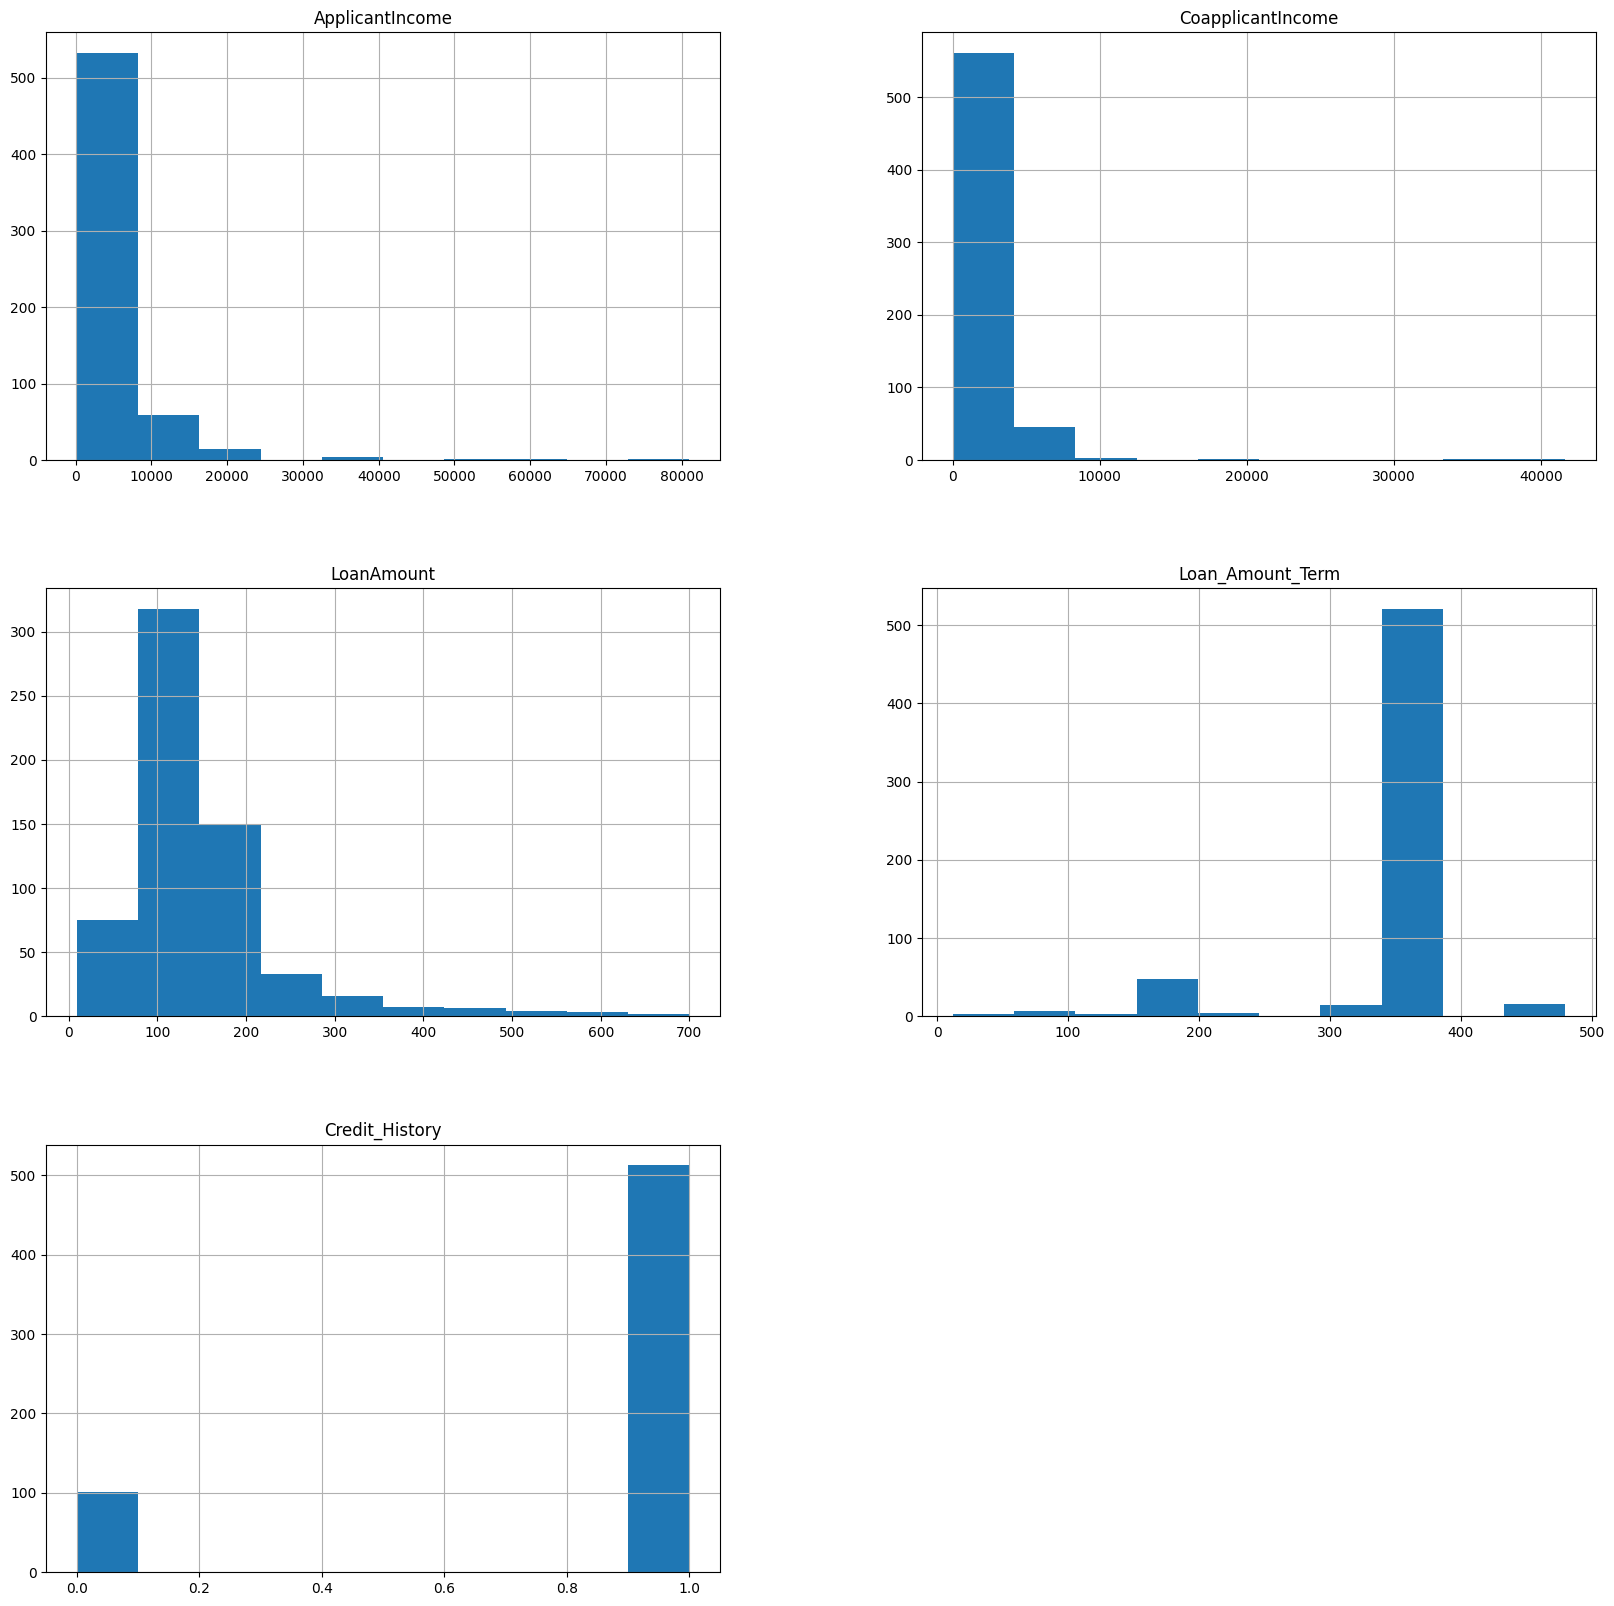

In [40]:
df.hist(figsize=(20,20))
plt.show()

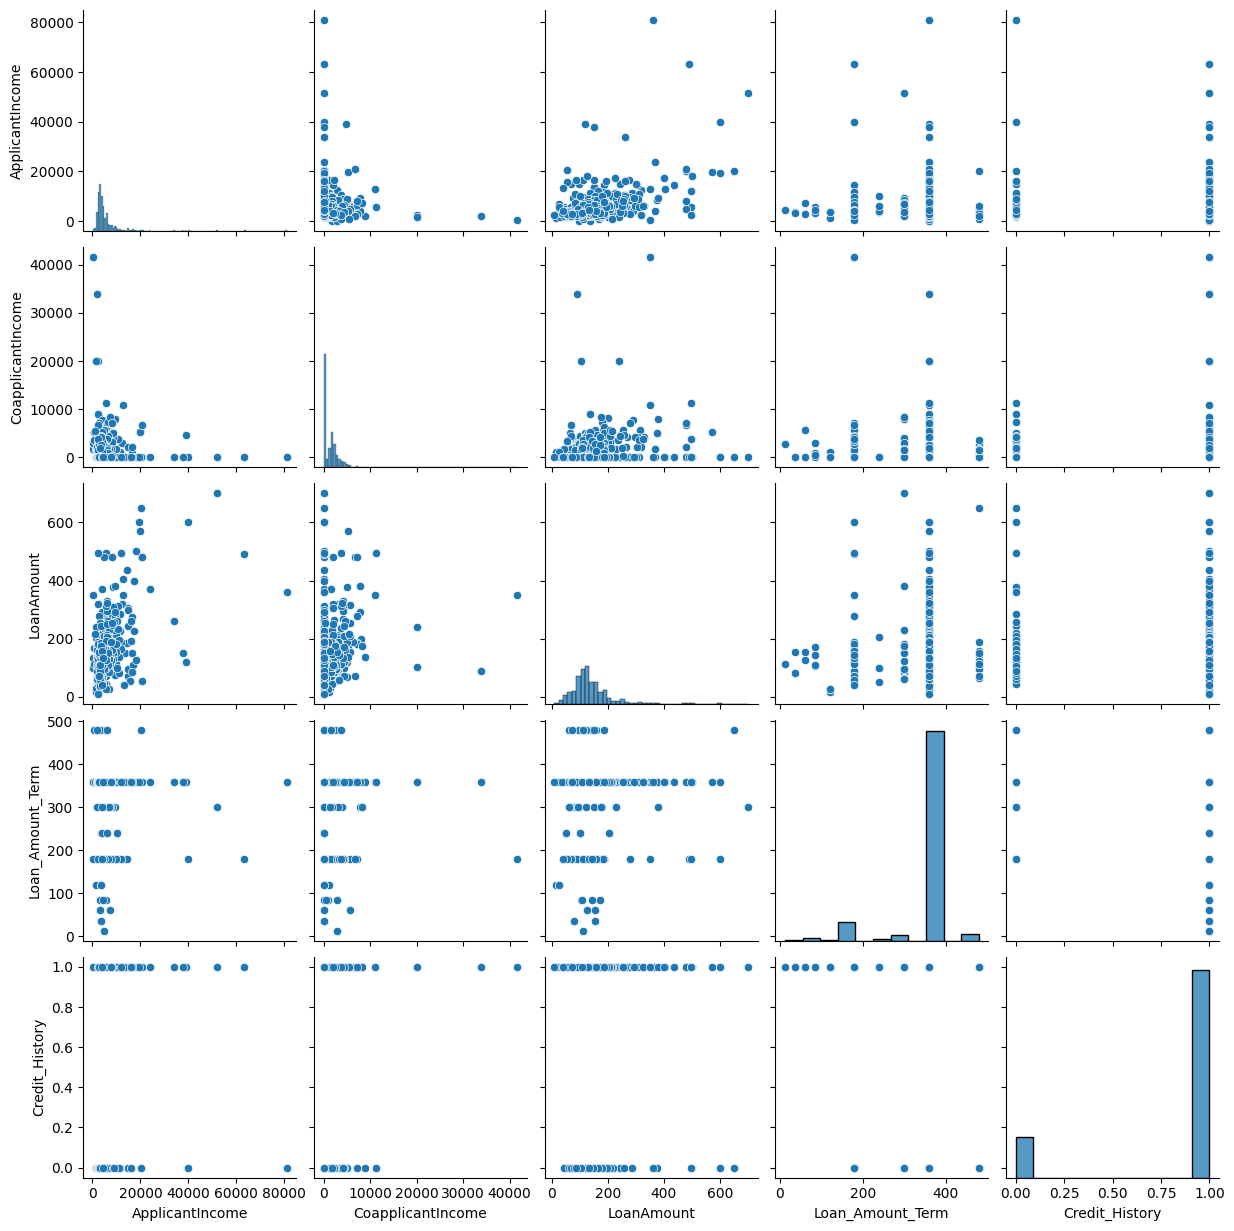

In [41]:
sns.pairplot(df)

In [42]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,
            color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)

    plt.show()
    print("{}: \n {}".format(variable,varValue))

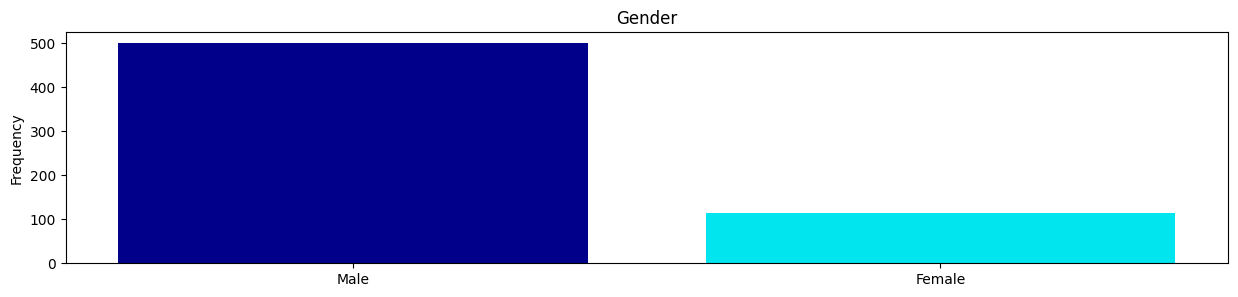

Gender: 
 Male      500
Female    114
Name: Gender, dtype: int64


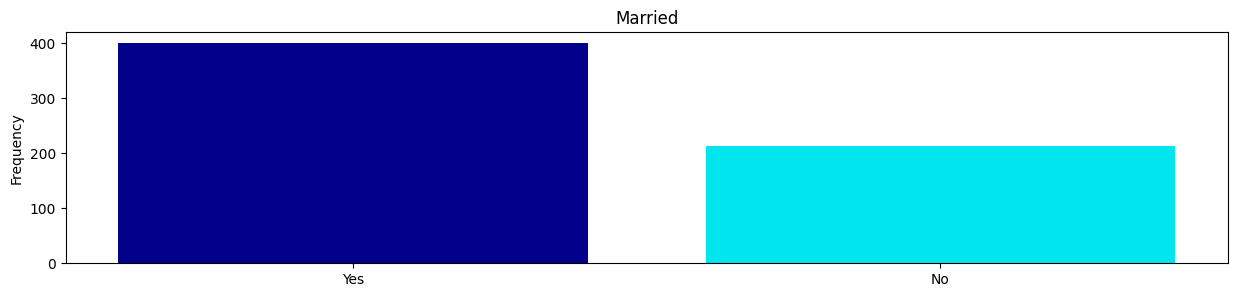

Married: 
 Yes    400
No     214
Name: Married, dtype: int64


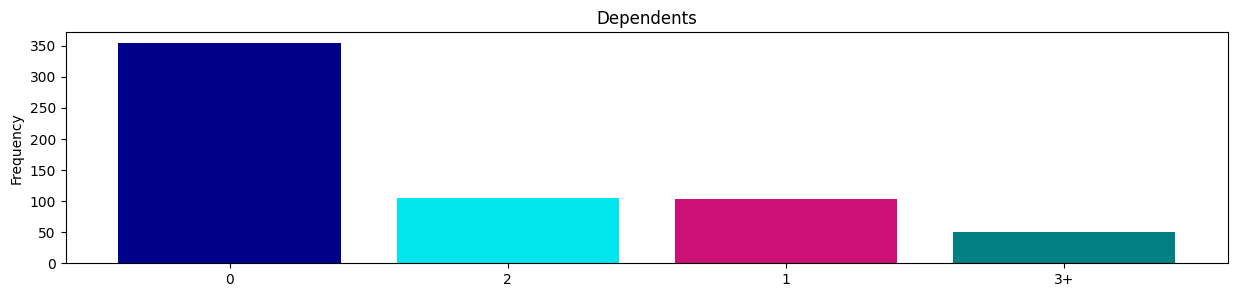

Dependents: 
 0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64


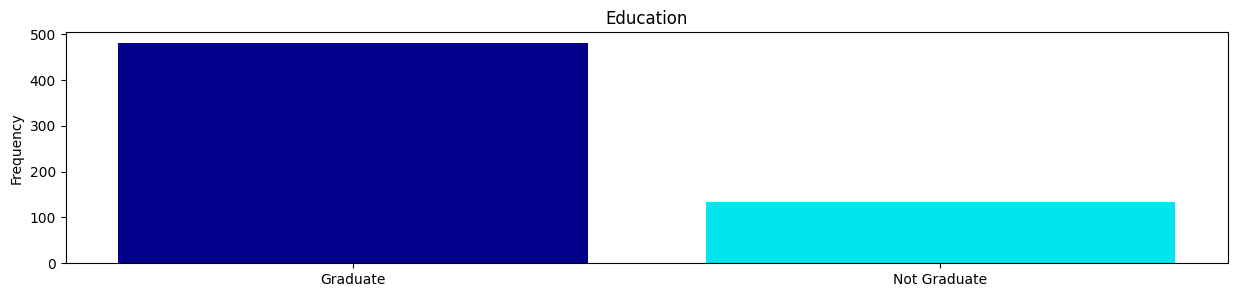

Education: 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


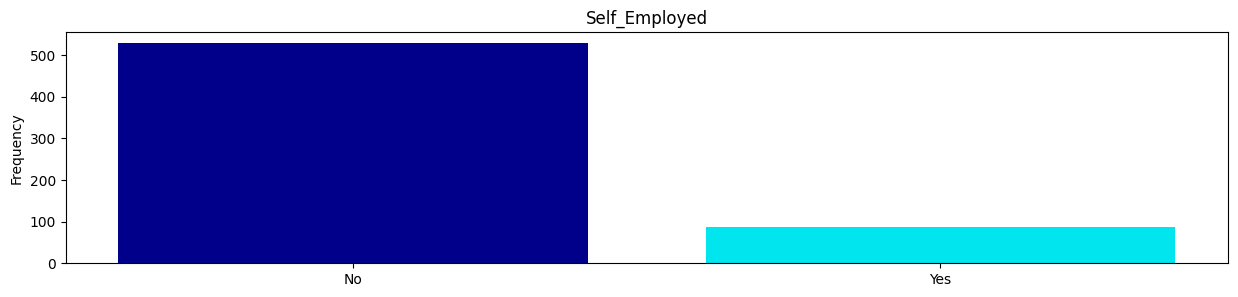

Self_Employed: 
 No     528
Yes     86
Name: Self_Employed, dtype: int64


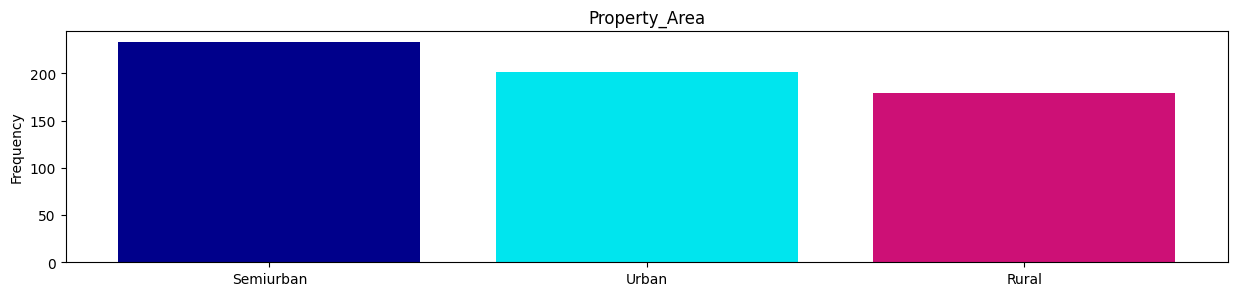

Property_Area: 
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


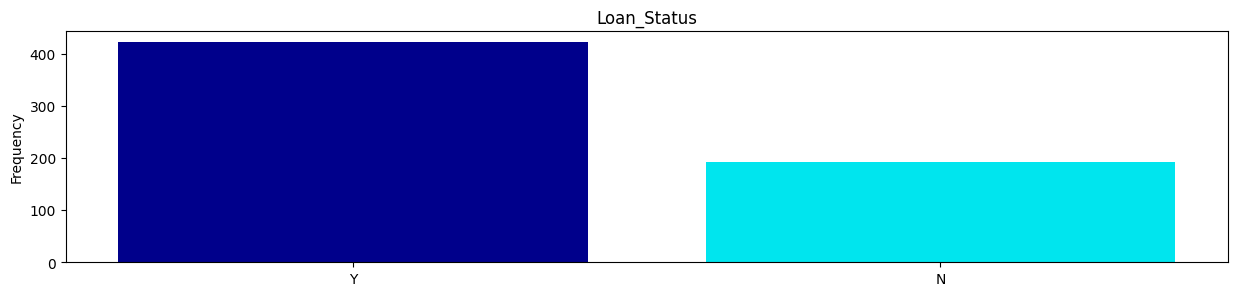

Loan_Status: 
 Y    422
N    192
Name: Loan_Status, dtype: int64


In [43]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for c in categorical_cols:
    bar_plot(c)

In [44]:
cat_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

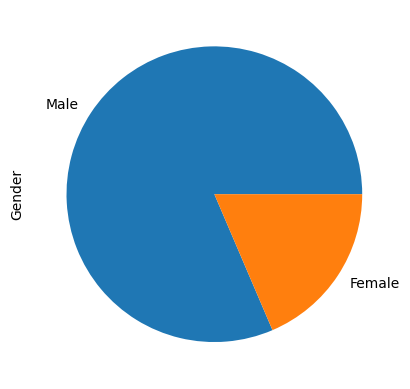

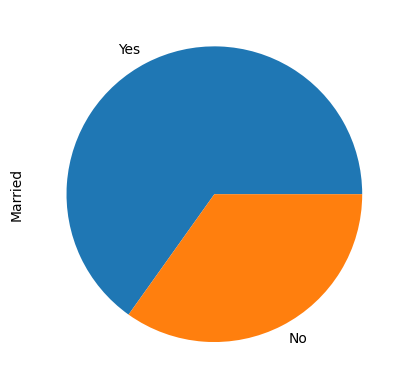

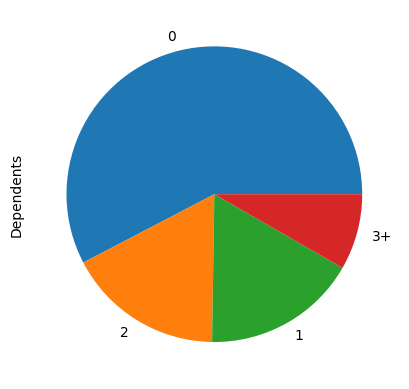

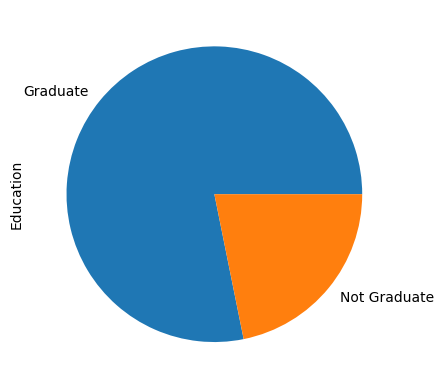

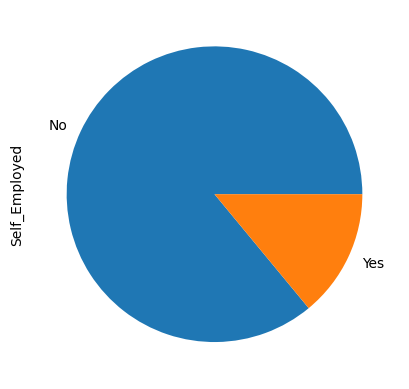

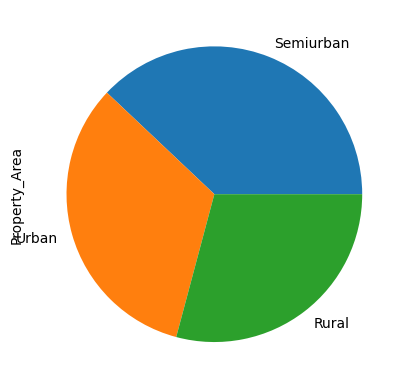

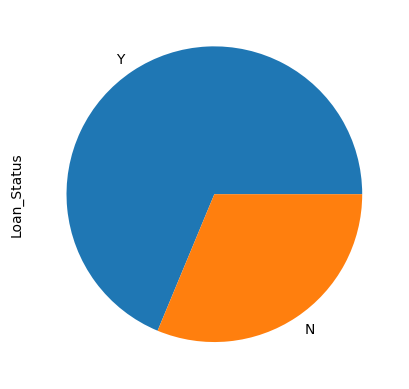

In [45]:
for col in cat_col :
    plt.figure()
    df[col].value_counts().plot.pie()

In [46]:
def Count_categorcial_variables(df):
    categorcial_variables = df.select_dtypes(include=['object']).columns.tolist()
    #fig = plt.figure(figsize=(14, 18))

    for index, col in enumerate(categorcial_variables):
        print("------------",col," value counts---------------------")
        print(df[col].value_counts())
        #fig.add_subplot(3, 2, index+1)
        #dataframe[col].value_counts()[:20].plot(kind='bar', title=col, color = "royalblue")
        #plt.tight_layout()

    print("\n\n------------Number of categories in each columns---------------------")
    for i in categorcial_variables:
        a = df[i].unique()
        print("There are {} categories in {}".format(len(a),i))
Count_categorcial_variables(df)

------------ Gender  value counts---------------------
Male      500
Female    114
Name: Gender, dtype: int64
------------ Married  value counts---------------------
Yes    400
No     214
Name: Married, dtype: int64
------------ Dependents  value counts---------------------
0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64
------------ Education  value counts---------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
------------ Self_Employed  value counts---------------------
No     528
Yes     86
Name: Self_Employed, dtype: int64
------------ Property_Area  value counts---------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
------------ Loan_Status  value counts---------------------
Y    422
N    192
Name: Loan_Status, dtype: int64


------------Number of categories in each columns---------------------
There are 2 categories in Gender
There are 2 categories in Married
There are 4 

# Univarient Analysis

In [47]:
df['Gender'].value_counts()

Male      500
Female    114
Name: Gender, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

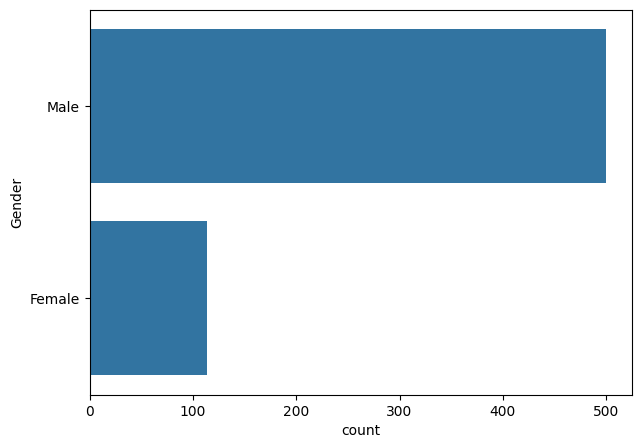

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Gender'])

<Axes: ylabel='Gender'>

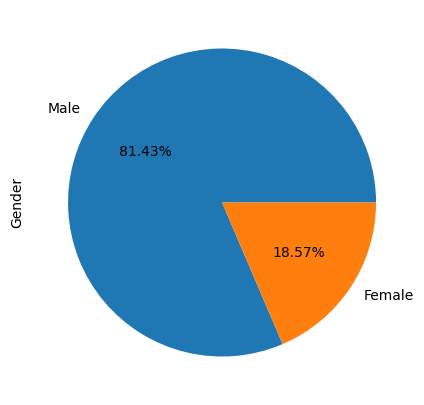

In [49]:
plt.figure(figsize=(7,5))
df['Gender'].value_counts().plot.pie(autopct="%0.2f%%")

In [50]:
df['Married'].value_counts()

Yes    400
No     214
Name: Married, dtype: int64

<Axes: xlabel='count', ylabel='Married'>

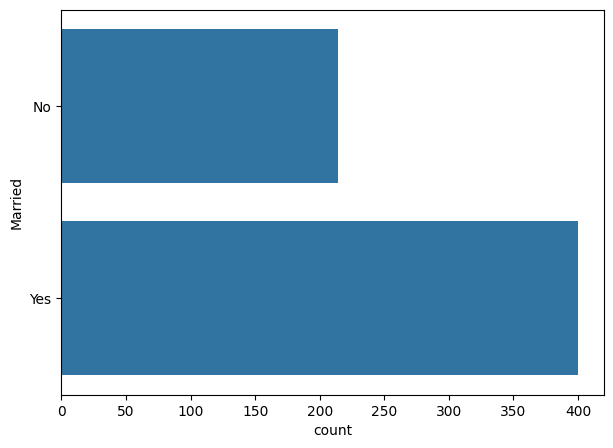

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Married'])

<Axes: ylabel='Married'>

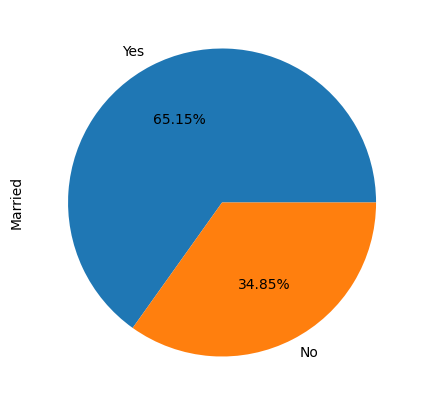

In [52]:
plt.figure(figsize=(7,5))
df['Married'].value_counts().plot.pie(autopct="%0.2f%%")

In [53]:
df['Dependents'].value_counts()

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

<Axes: xlabel='count', ylabel='Dependents'>

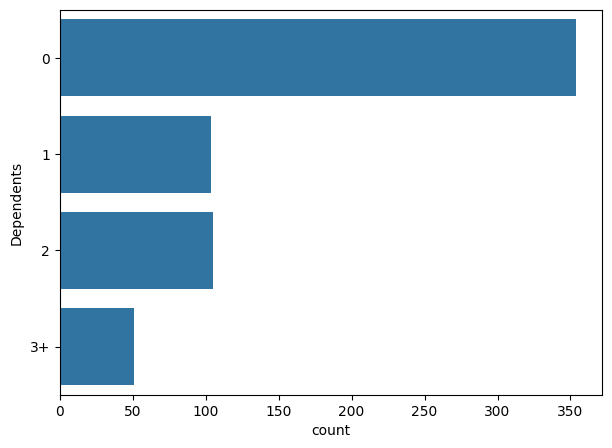

In [54]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Dependents'])

<Axes: ylabel='Dependents'>

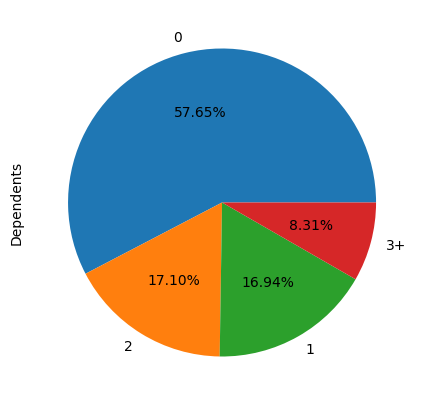

In [55]:
plt.figure(figsize=(7,5))
df['Dependents'].value_counts().plot.pie(autopct="%0.2f%%")

In [56]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<Axes: xlabel='count', ylabel='Education'>

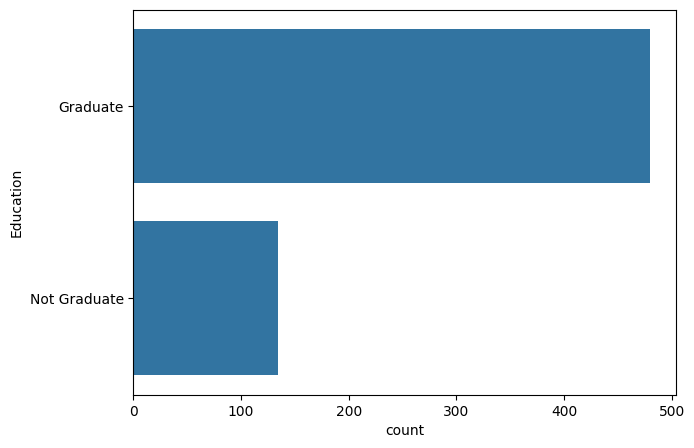

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Education'])

<Axes: ylabel='Education'>

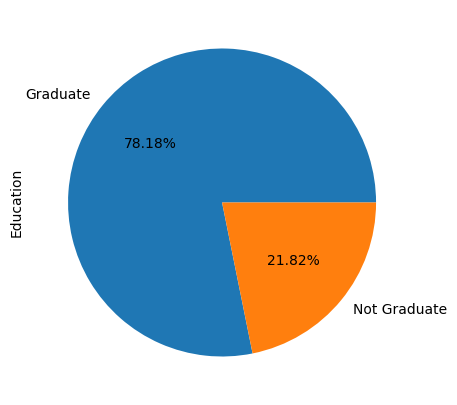

In [58]:
plt.figure(figsize=(7,5))
df['Education'].value_counts().plot.pie(autopct="%0.2f%%")

In [59]:
df['Self_Employed'].value_counts()

No     528
Yes     86
Name: Self_Employed, dtype: int64

<Axes: xlabel='count', ylabel='Self_Employed'>

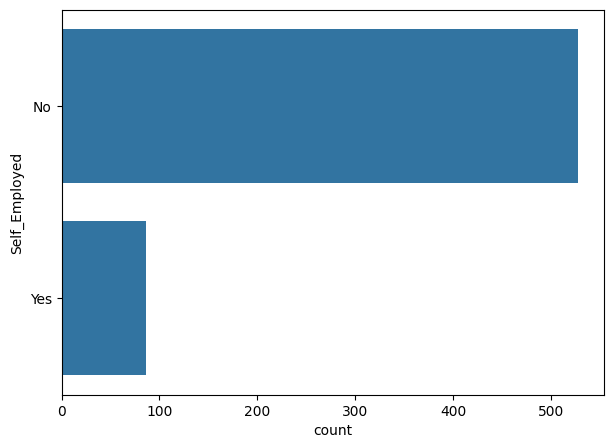

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Self_Employed'])

<Axes: ylabel='Self_Employed'>

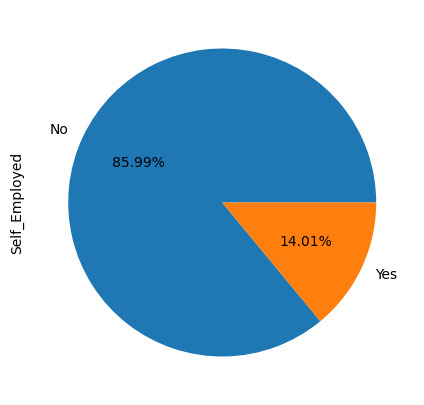

In [61]:
plt.figure(figsize=(7,5))
df['Self_Employed'].value_counts().plot.pie(autopct="%0.2f%%")

In [62]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<Axes: xlabel='count', ylabel='Property_Area'>

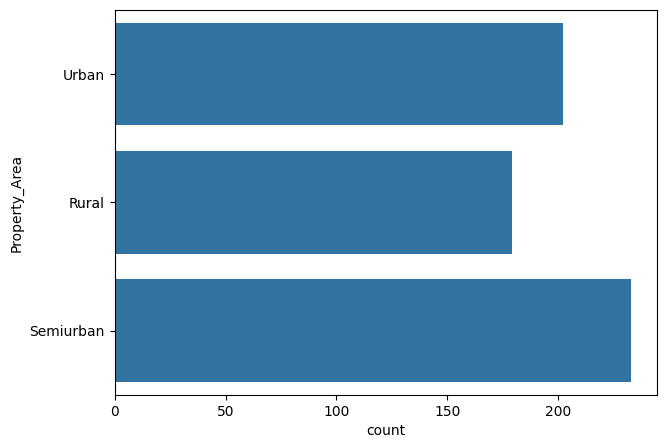

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Property_Area'])

<Axes: ylabel='Property_Area'>

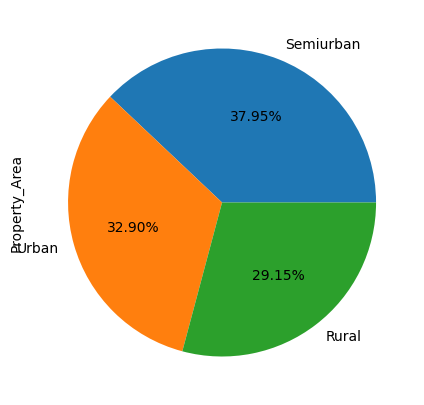

In [64]:
plt.figure(figsize=(7,5))
df['Property_Area'].value_counts().plot.pie(autopct="%0.2f%%")

In [65]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: xlabel='count', ylabel='Loan_Status'>

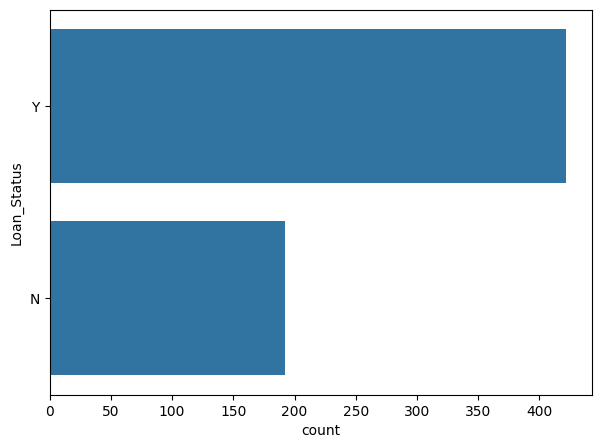

In [66]:
plt.figure(figsize=(7,5))
sns.countplot(y = df['Loan_Status'])

<Axes: ylabel='Loan_Status'>

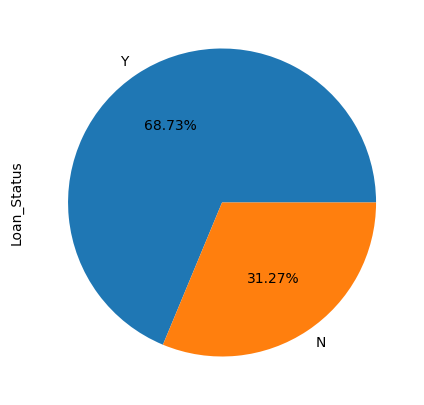

In [67]:
plt.figure(figsize=(7,5))
df['Loan_Status'].value_counts().plot.pie(autopct="%0.2f%%")

# Tree Map

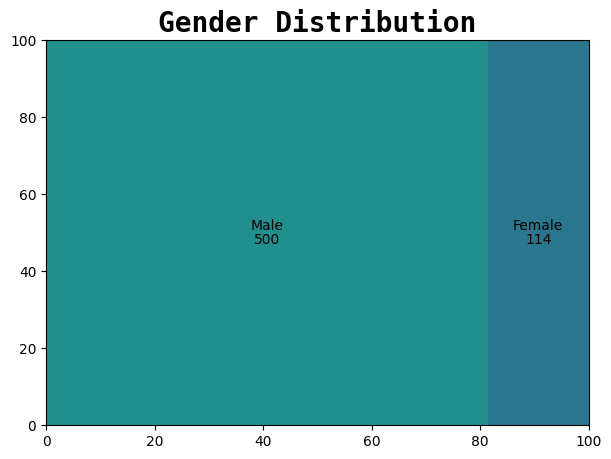

In [68]:
gender = df['Gender'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = gender.values, label = gender.index, value = gender.values)
plt.title('Gender Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

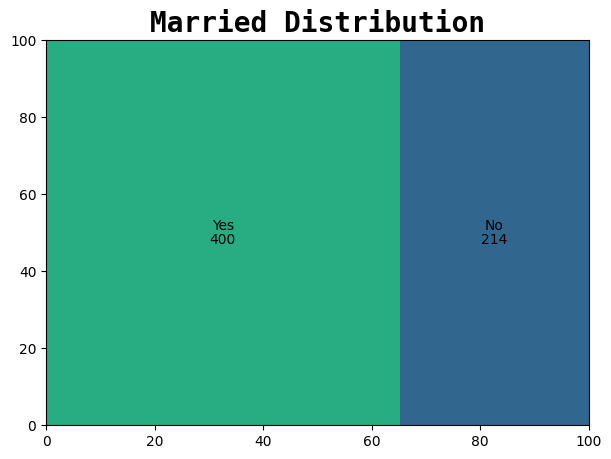

In [69]:
married = df['Married'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = married.values, label = married.index, value = married.values)
plt.title('Married Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

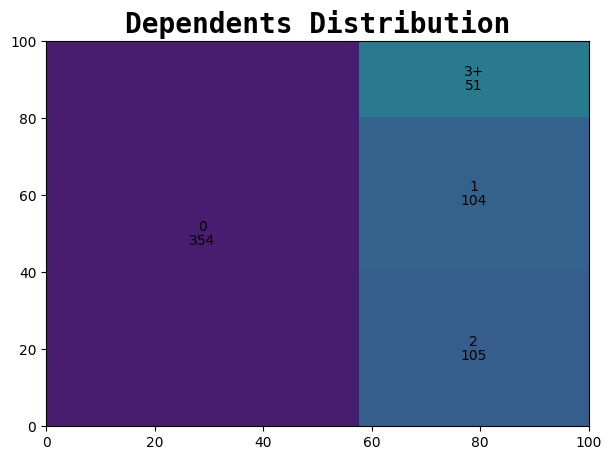

In [70]:
dependents = df['Dependents'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = dependents.values, label = dependents.index, value = dependents.values)
plt.title('Dependents Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

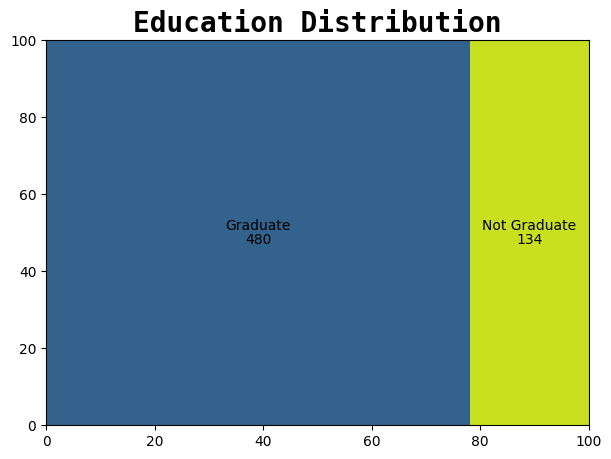

In [71]:
education = df['Education'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = education.values, label = education.index, value = education.values)
plt.title('Education Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

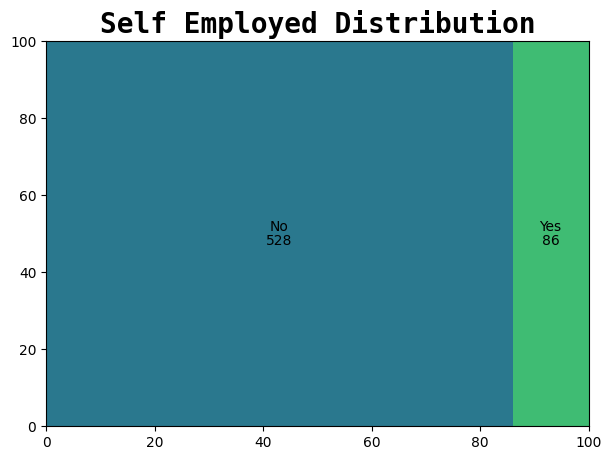

In [72]:
self_employed = df['Self_Employed'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = self_employed.values, label = self_employed.index, value = self_employed.values)
plt.title('Self Employed Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

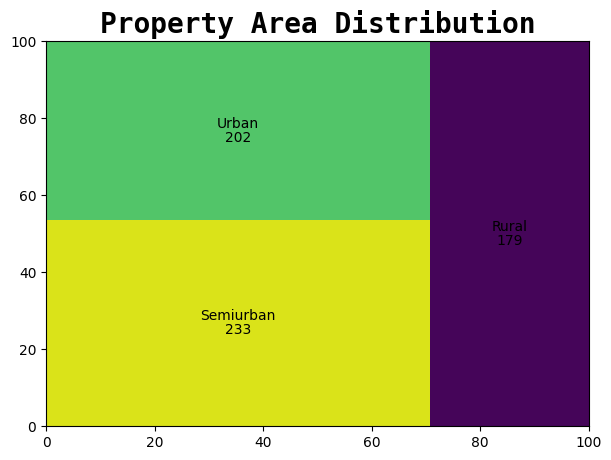

In [73]:
property_area = df['Property_Area'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = property_area.values, label = property_area.index, value = property_area.values)
plt.title('Property Area Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

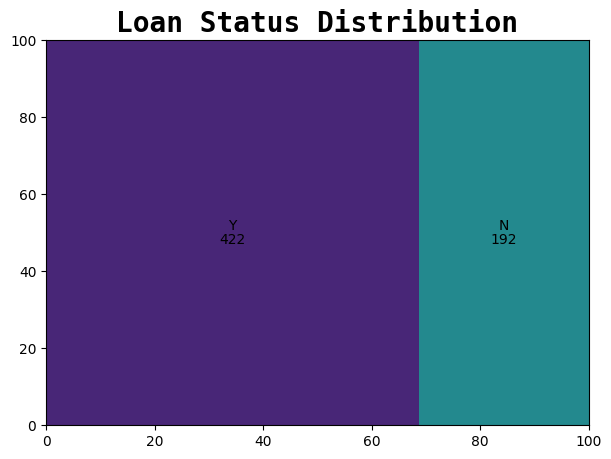

In [74]:
loan_status = df['Loan_Status'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = loan_status.values, label = loan_status.index, value = loan_status.values)
plt.title('Loan Status Distribution',
          fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status).
Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area).
Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

# Independent Variable (Categorical)

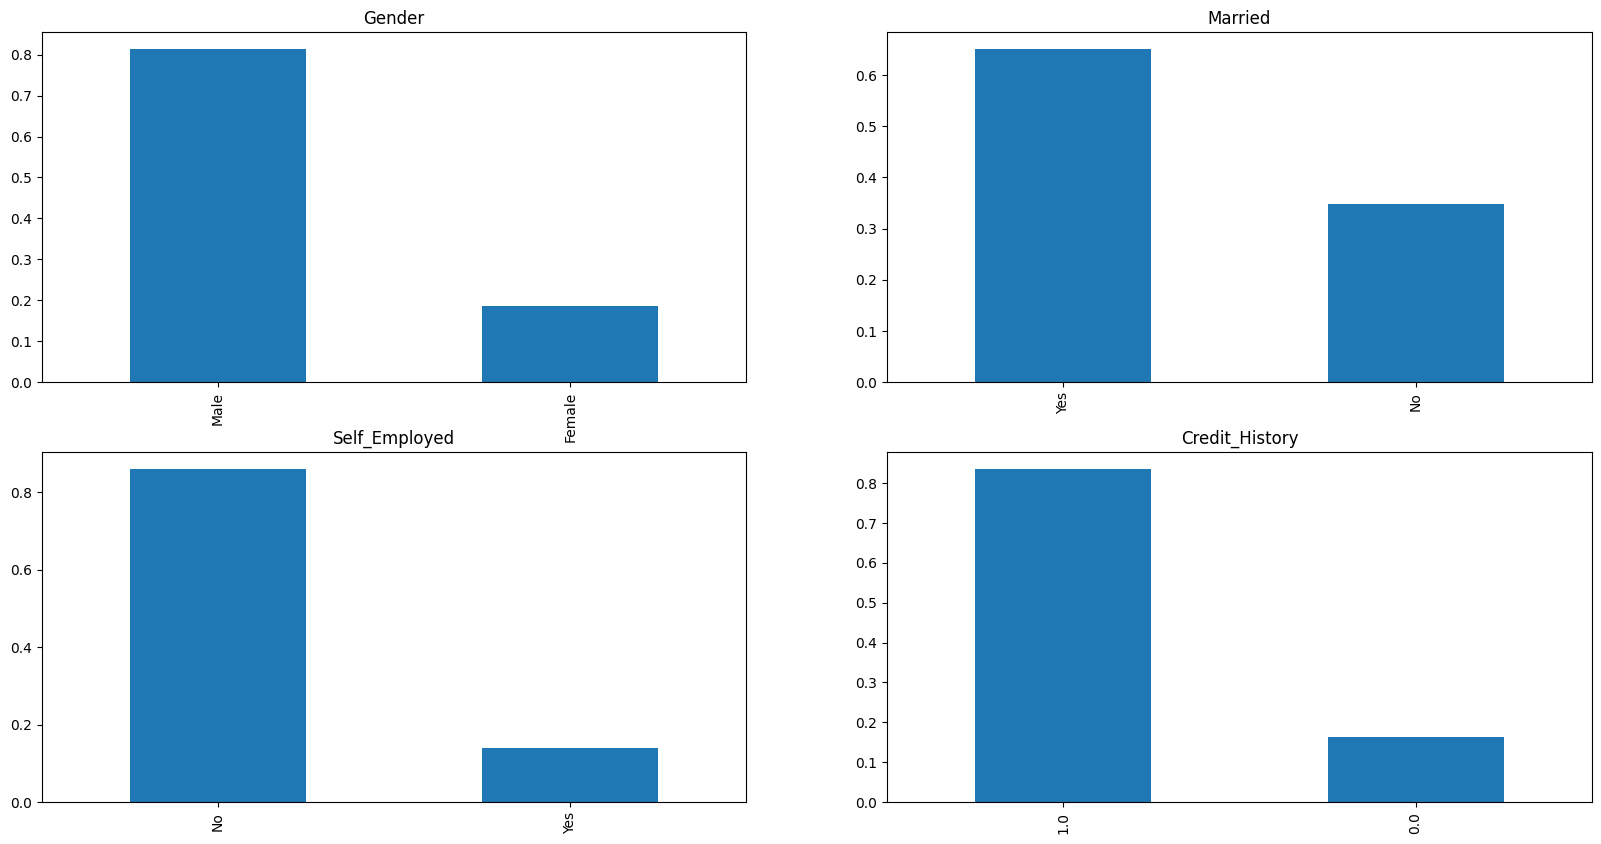

In [75]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.subplot(222)
df['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')
plt.show()

# Independent Variable (Ordinal)

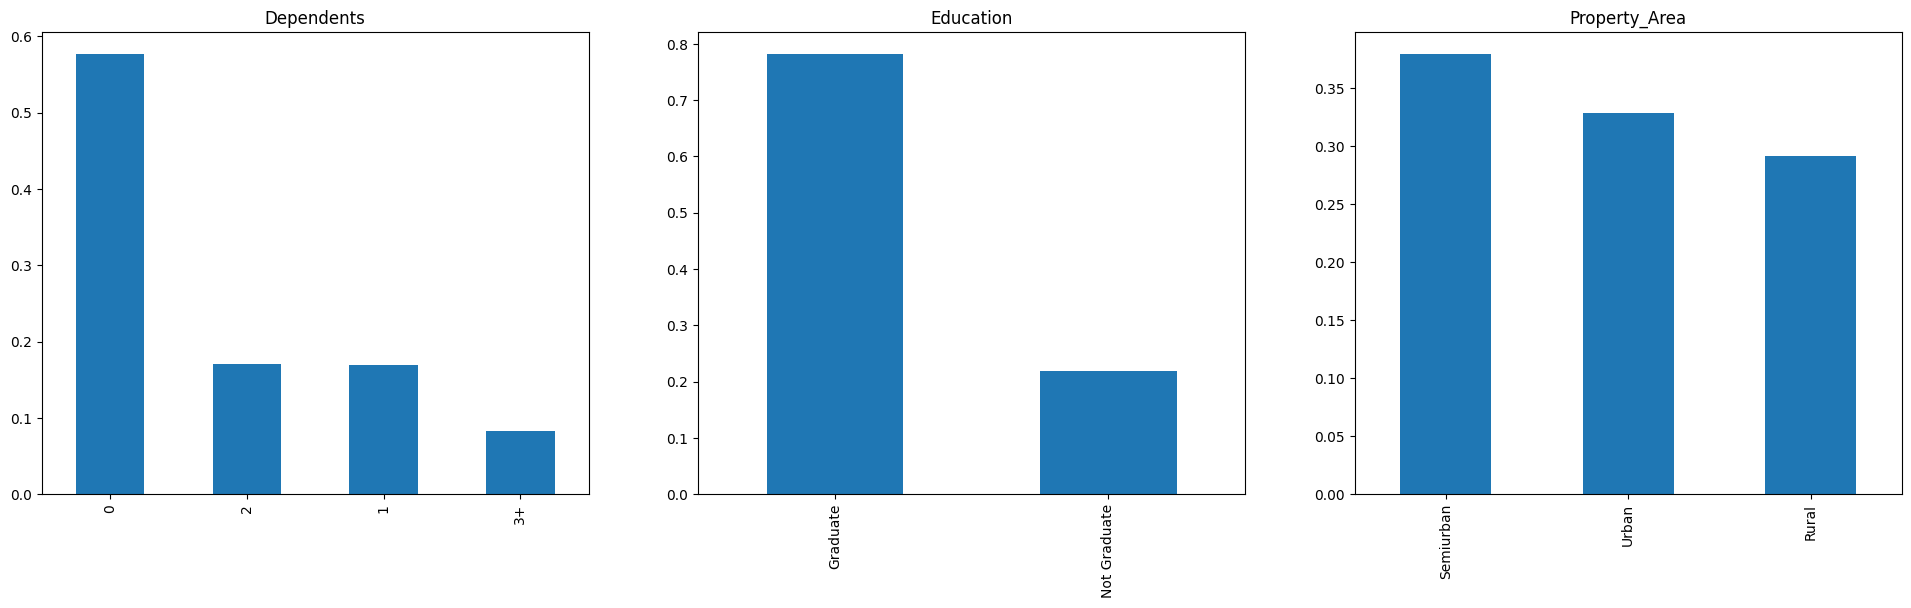

In [76]:
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize = True).plot.bar(figsize=(24,6),title ='Dependents')
plt.subplot(132)
df['Education'].value_counts(normalize = True).plot.bar(title = 'Education')
plt.subplot(133)
df['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')
plt.show()

# Independent Variable (Numerical)

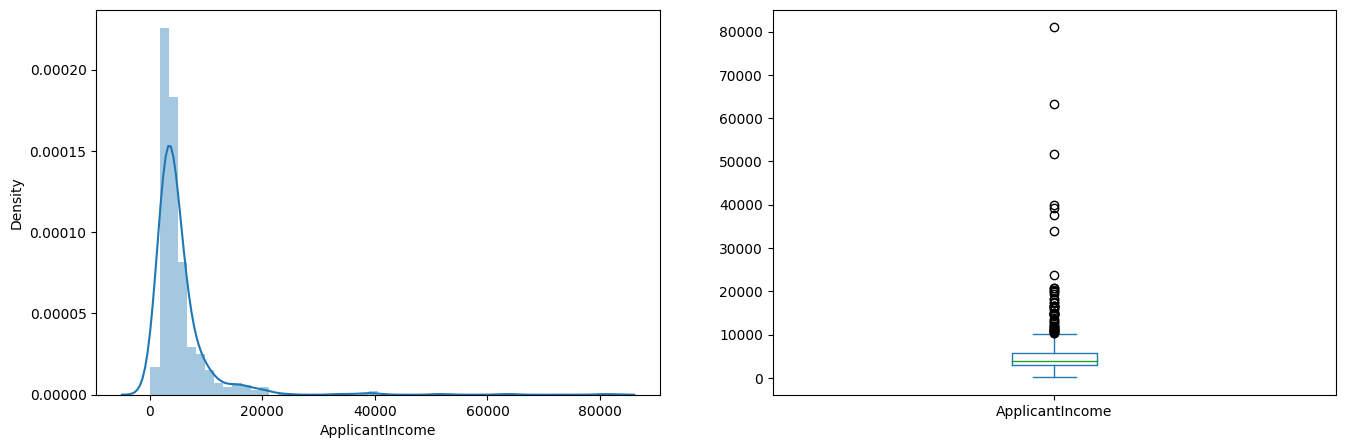

In [77]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

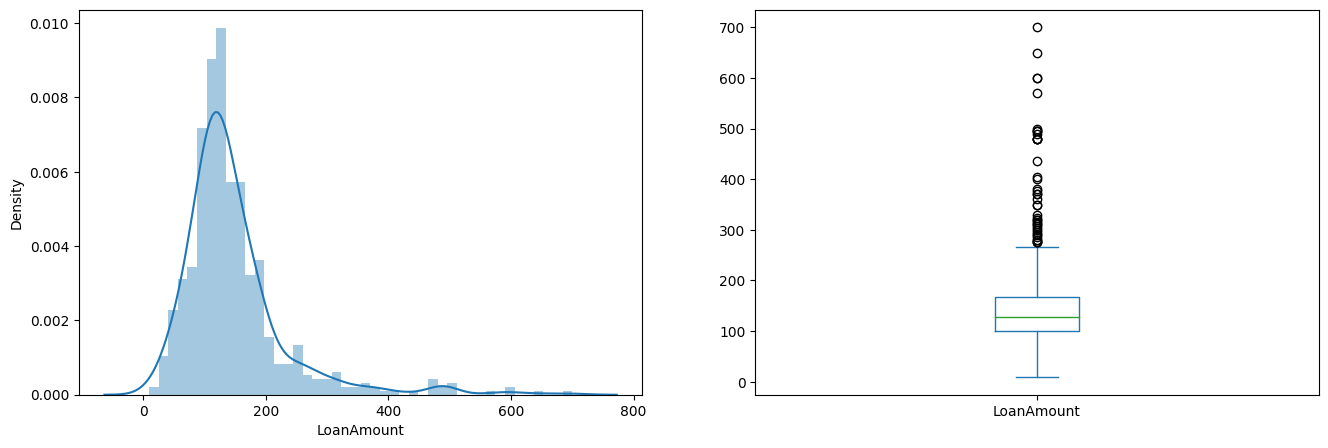

In [78]:
plt.figure(1)
plt.subplot(121)
df = df.dropna()
sns.distplot(df['LoanAmount']);
plt.subplot(122)
df['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

# Bivariate Analysis

<Axes: xlabel='Gender'>

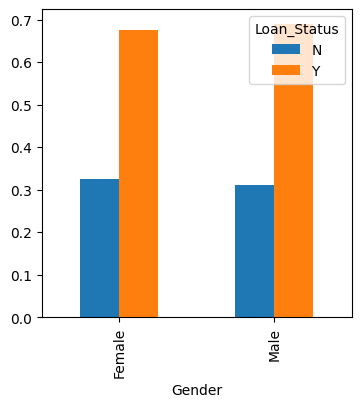

In [79]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = "bar", figsize = (4,4))

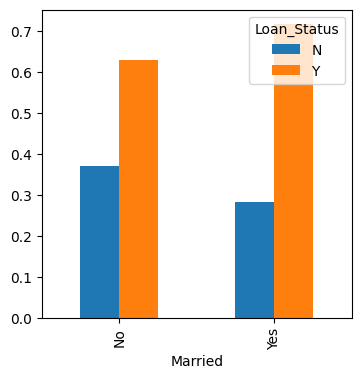

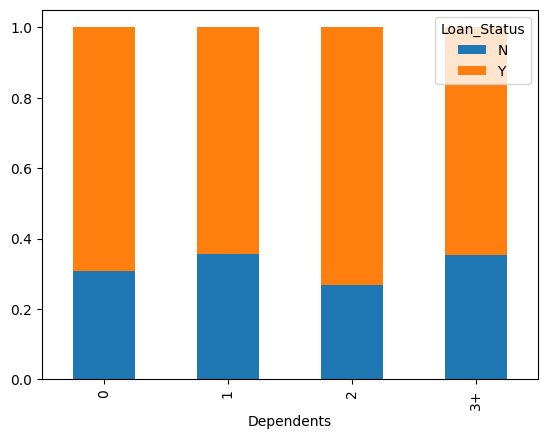

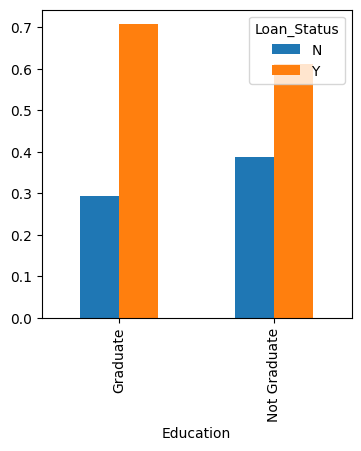

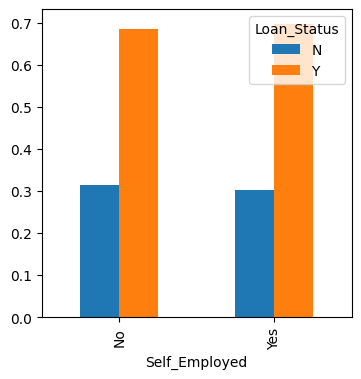

In [80]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar", figsize = (4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar", figsize = (4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis = 0).plot(kind = "bar",figsize = (4,4))
plt.show()

The proportion of married applicants is higher for the approved loans.
The distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

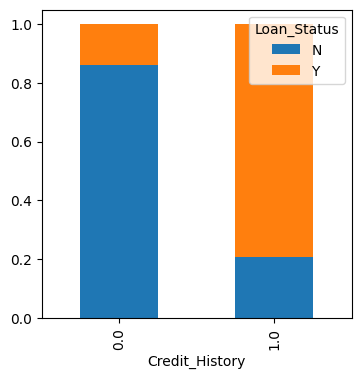

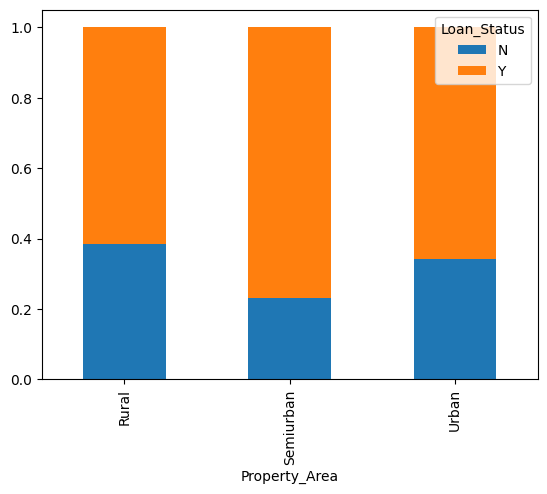

In [81]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Property_Area = pd.crosstab(df['Property_Area'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True)
plt.show()

    It seems people with a credit history of 1 are more likely to get their loans approved.
    The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

<Axes: xlabel='Loan_Status'>

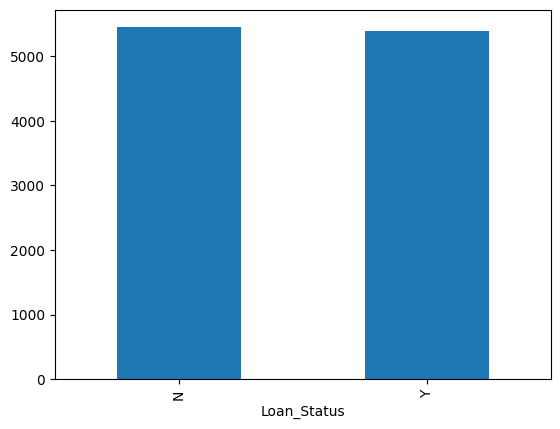

In [82]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

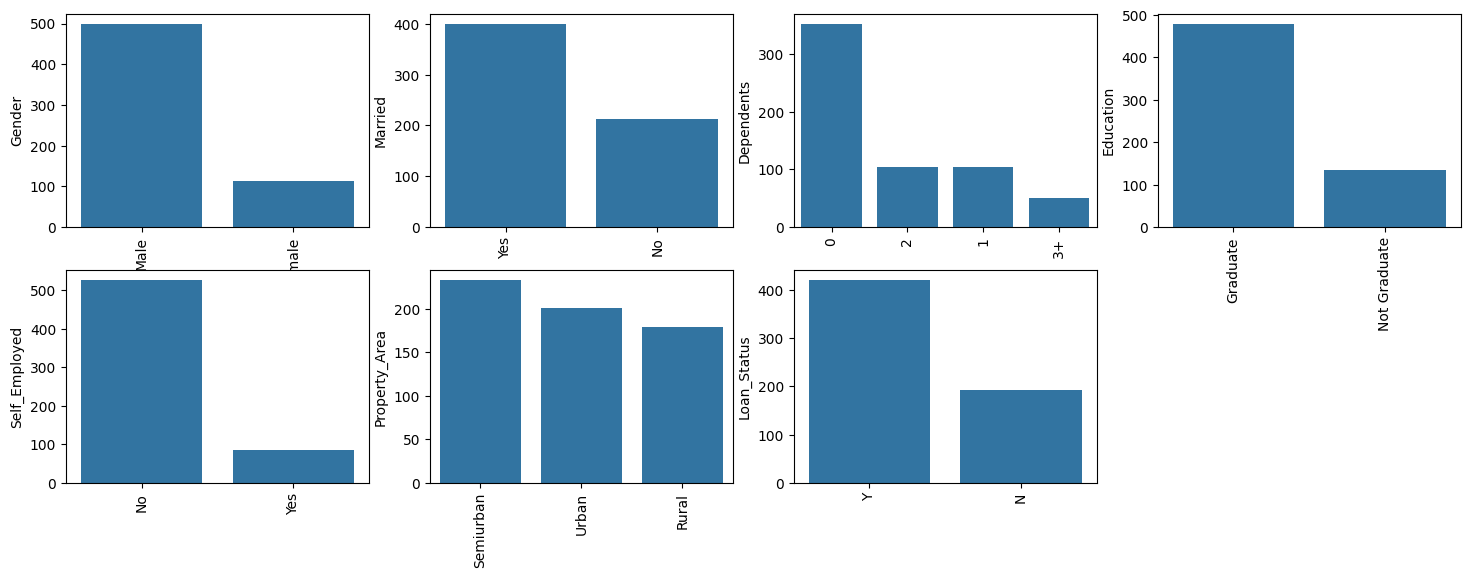

In [83]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize = (18,36))
index = 1

for col in object_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x = list(y.index), y = y)
  index +=1

In [84]:
df['Gender'] = df['Gender'].map({'Male': 0,'Female': 1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [85]:
df['Married'] = df['Married'].map({'Yes': 0, 'No': 1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,0,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [86]:
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,0,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [87]:
df['Education'] = df['Education'].map({'Graduate': 0, 'Not Graduate': 1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,0,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,0,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,0,2,0,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [88]:
df['Self_Employed'] = df['Self_Employed'].map({'No': 0, 'Yes': 1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [89]:
df['Property_Area'] = df['Property_Area'].map({'Semiurban': 0, 'Urban': 1, 'Rural': 2})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,2,N
2,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,Y
3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,Y
5,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,Y


In [90]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 0, 'N': 1})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,0,1,0,0,4583,1508.0,128.0,360.0,1.0,2,1
2,0,0,0,0,1,3000,0.0,66.0,360.0,1.0,1,0
3,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0
4,0,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,0
5,0,0,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0


# Training & Testing Data

In [91]:
from sklearn.model_selection import train_test_split

X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((367, 11), (246, 11), (367,), (246,))

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 96.18528610354224
Accuracy score of  KNeighborsClassifier = 79.56403269754769
Accuracy score of  SVC = 70.29972752043598
Accuracy score of  LogisticRegression = 81.47138964577657


In [93]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 77.64227642276423
Accuracy score of  KNeighborsClassifier = 59.34959349593496
Accuracy score of  SVC = 67.47967479674797
Accuracy score of  LogisticRegression = 80.48780487804879
